#Rideshare Conversion Analysis

To explore the possibilities of converting "customers" to "subscribers".  The approach I took, was to find "customers" that could be classified as "subscribers" to a high probability.  Since this activity was part of a consulting workshop, my team only had time to do discovery level analysis.

### Signifficant Variables
The strongest indicator of a subscriber, was the duration of trips.  A higher duration cooreldated strongly with customers.  Subscribers took frequent, shorter duration trips.

### Further Exploration
We observed that time of day may factor in on how the two user types use bikes.  Adding an extra categorical of "time of day" broken down between 2-6 hour increments, may also provide an important factor to consider for classification of potential subscribers within the customer base.  Also, logistic regression may provide a more flexible score for this type of problem.  Unfortunately, the logit work didn't save in the last version of this notebook but it should be straight forward for anyone to continue working on this.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [29]:
df = pd.read_csv('/Users/davidyerrington/Downloads/201408_trip_data - 201408_trip_data.csv')
df['hours'] = df['Duration (mins)'] / 60

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109c74c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b5a2b50>]], dtype=object)

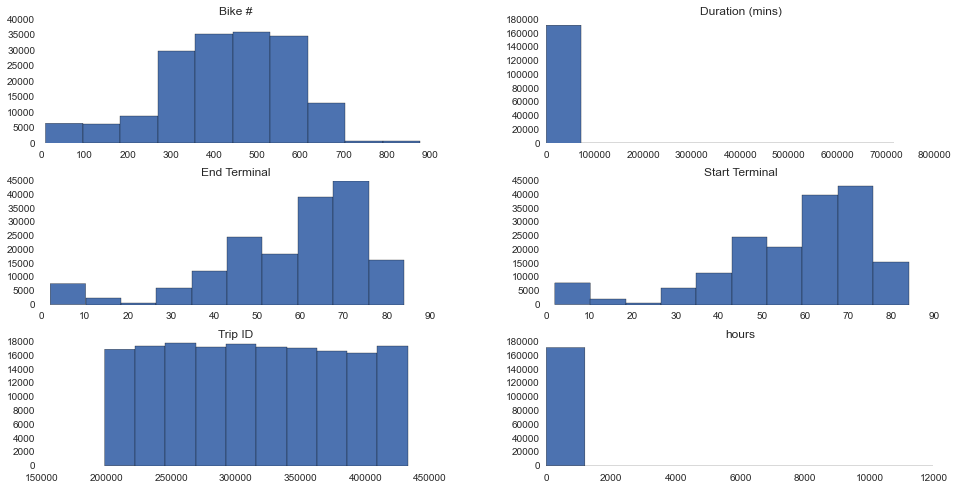

In [30]:
df.hist(figsize=(16,8))

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip ID,171792,315198.766503,67369.726104,198776,256967.75,314366.500000,373070.250000,432946.000000
Duration (mins),171792,1132.514250,6084.234943,60,345.00,517.000000,761.000000,716480.000000
Start Terminal,171792,57.403622,17.599744,2,50.00,61.000000,70.000000,84.000000
End Terminal,171792,57.382090,17.668405,2,50.00,61.000000,70.000000,84.000000
Bike #,171792,429.216692,151.841710,9,335.00,442.000000,546.000000,878.000000
hours,171792,18.875237,101.403916,1,5.75,8.616667,12.683333,11941.333333


In [34]:
df['start'] = pd.to_datetime(df['Start Date'])
df.index = df['start']



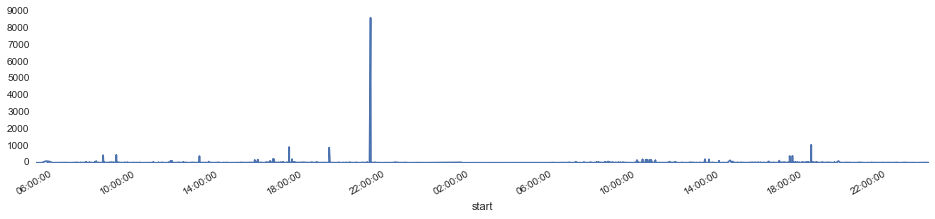

In [35]:
ax = df['20140514':'20140515']['hours'].plot(figsize=(16,3))
# ax.xaxis.set_ticks(np.arange(df['20140401':'20140430']['hours'].min(), df['20140401':'20140430']['hours'].max()+1, 1))

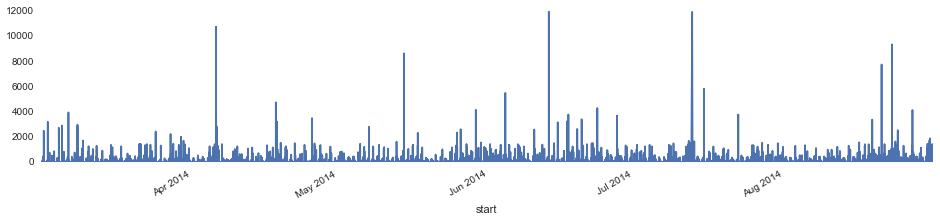

In [36]:
ax = df['20140101':'20141230']['hours'].plot(figsize=(16,3))

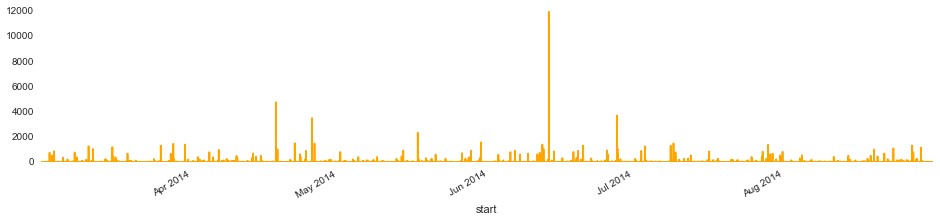

In [136]:
ax = df['20140101':'20141230'][df['Subscriber Type'] == 'Subscriber']['hours'].plot(figsize=(16,3), color="orange")

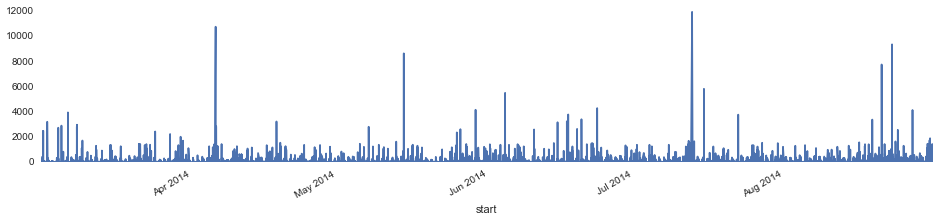

In [55]:
ax = df['20140101':'20141230'][df['Subscriber Type'] == 'Customer']['hours'].plot(figsize=(16,3))

In [91]:
print 'Customer total: ', df[df['Subscriber Type'] == 'Customer']['Subscriber Type'].count()
print 'Customer mean minutes: ', df[df['Subscriber Type'] == 'Customer']['hours'].mean()
print 'Subscriber total: ', df[df['Subscriber Type'] == 'Subscriber']['Subscriber Type'].count()
print 'Subscriber mean minutes: ', df[df['Subscriber Type'] == 'Subscriber']['hours'].mean()
print 'Over mean minutes: ' , df['hours'].mean()

Customer total:  28910
Customer mean minutes:  64.8505799608
Subscriber total:  142882
Subscriber mean minutes:  9.5728260616
Over mean minutes:  18.8752374965


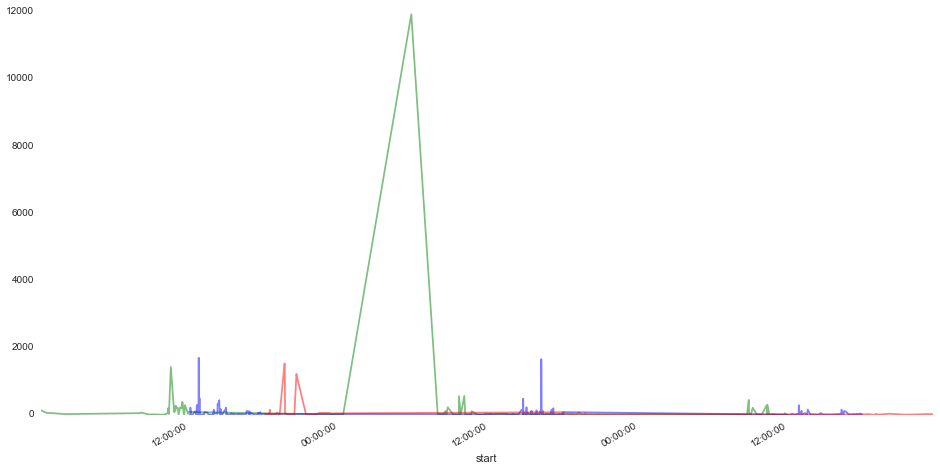

In [45]:
def plot_type(type=False, start='20140101', end='20141230'):
    
    if type:
        
        data = df[df['Subscriber Type'] == type]
        
        # morning
        ax1 = data[start:end]['hours'].between_time('12:01 AM','11:59 AM').plot(color='green', alpha=0.5, figsize=(16,3))
        # noon
        ax2 = data[start:end]['hours'].between_time('12:01 PM','06:00 PM').plot(color='blue', ax=ax1, alpha=0.5, figsize=(16,3))
        # night
        data[start:end]['hours'].between_time('6:01 PM', '11:59 PM').plot(color='red', ax=ax2, figsize=(16,8), alpha=0.5)
    
    else:
        
        # morning
        ax1 = df[start:end]['hours'].between_time('12:01 AM','11:59 AM').plot(color='green', alpha=0.5, figsize=(16,3))
        # noon
        ax2 = df[start:end]['hours'].between_time('12:01 PM','06:00 PM').plot(color='blue', ax=ax1, alpha=0.5, figsize=(16,3))
        # night
        df[start:end]['hours'].between_time('6:01 PM', '11:59 PM').plot(color='red', ax=ax2, figsize=(16,3), alpha=0.5)
    
    
plot_type(start='20140712', end='20140714', type='Customer')

stations_customer = df[df['Subscriber Type'] == 'Customer'].groupby('Start Station')
stations_subscriber = df[df['Subscriber Type'] == 'Subscriber'].groupby('Start Station')

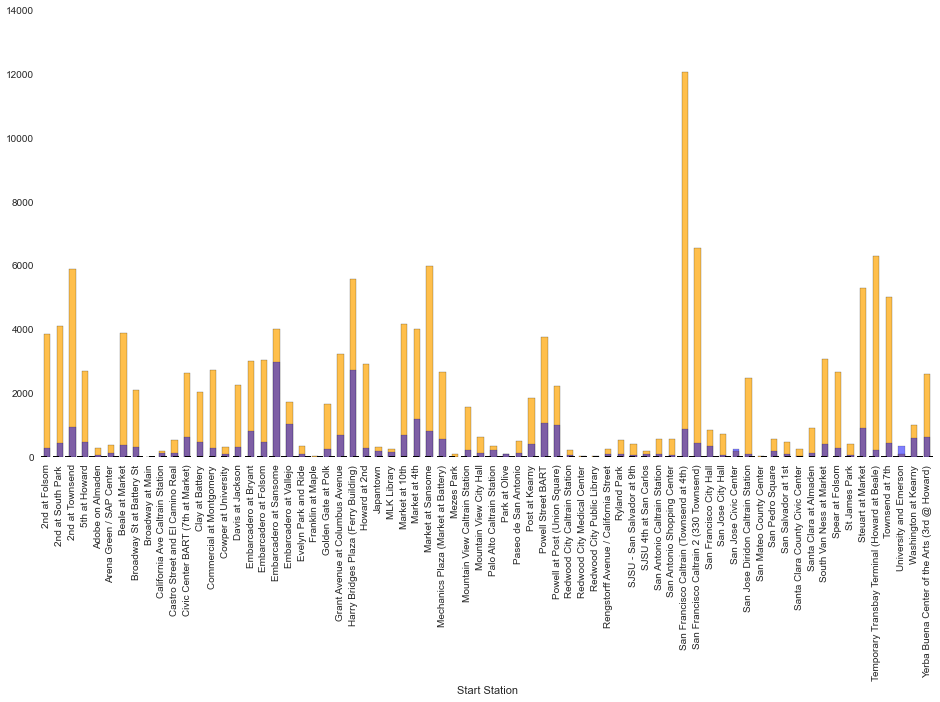

In [134]:
# df.groupby('Start Station')['Trip ID']
ax = stations_subscriber['Trip ID'].count().plot(kind='bar', color="orange", alpha=.7)
stations_customer['Trip ID'].count().plot(kind='bar', figsize=(16,8), ax=ax, color="blue", alpha=.5)

In [15]:
def real_len(input):
    
    try:
        return len(input)
    except:
        return 0

cust = df[df['Subscriber Type'] == 'Customer']
subs = df[df['Subscriber Type'] == 'Subscriber']
    
# zip_group_1 = cust[cust['Zip Code'].map(real_len) > 5].groupby('Zip Code')
# zip_group_1 = subs[cust['Zip Code'].map(real_len) > 5].groupby('Zip Code')

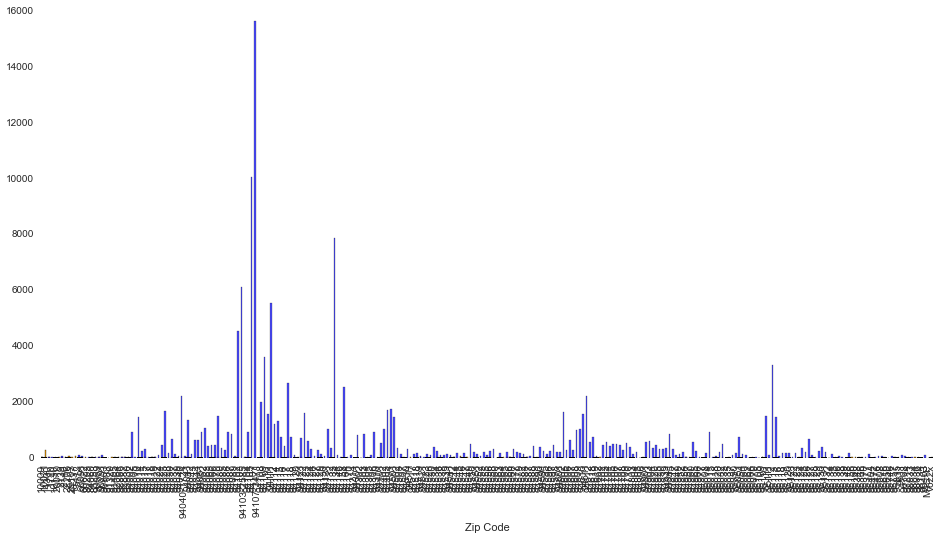

In [19]:
ax = cust.groupby('Zip Code')['Trip ID'].count().plot(kind='bar', figsize=(16,8), color='orange')
# subs.groupby('Zip Code')['Trip ID'].count().plot()
subs.groupby('Zip Code')['Trip ID'].count().plot(kind='bar', color='blue', figsize=(16,8), alpha=.7, ax=ax)

# zip_group['Trip ID'].count().plot(kind='bar', figsize=(16, 8))
# zip_group_1['Trip ID'].count().plot(kind='bar', figsize=(16, 8))


# ax = zip_group_1['Trip ID'].count().plot(kind='bar', figsize=(16, 8), color='orange', alpha=.7)
# zip_group_2['Trip ID'].count().plot(kind='bar', figsize=(16, 8), color='blue', ax=ax, alpha=.7)

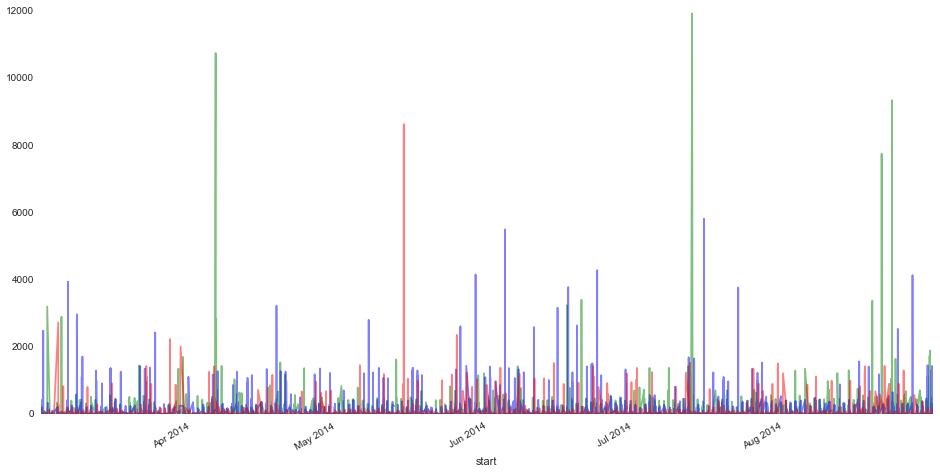

In [47]:
plot_type(type='Customer')

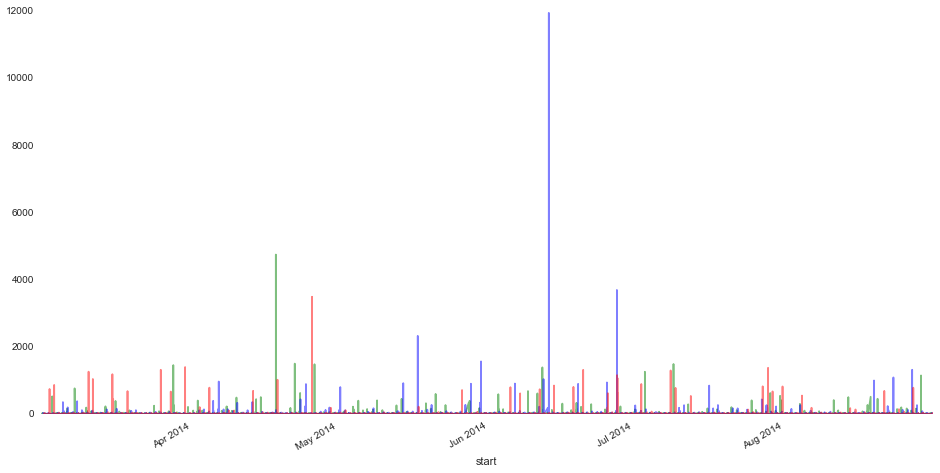

In [48]:
plot_type(type='Subscriber')

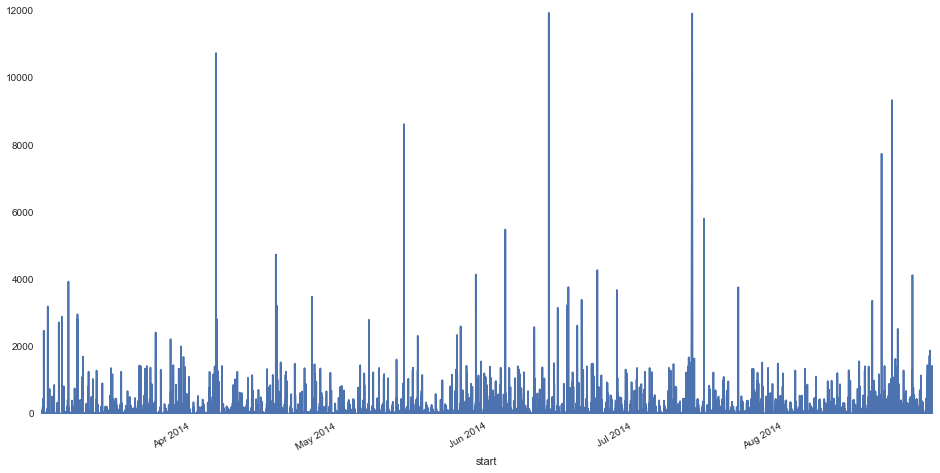

In [17]:
df.index = df['start']
df['hours'].plot(figsize=(16,8))

In [13]:
df.head()

,Trip ID,Duration (mins),Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,hours,start
start,,,,,,,,,,,,,
2014-08-31 22:31:00,432946,406,8/31/2014 22:31:00,Mountain View Caltrain Station,28,8/31/2014 22:38:00,Castro Street and El Camino Real,32,17,Subscriber,94040,6.766667,2014-08-31 22:31:00
2014-08-31 22:07:00,432945,468,8/31/2014 22:07:00,Beale at Market,56,8/31/2014 22:15:00,Market at 4th,76,509,Customer,11231,7.800000,2014-08-31 22:07:00
2014-08-31 22:06:00,432944,534,8/31/2014 22:06:00,Beale at Market,56,8/31/2014 22:15:00,Market at 4th,76,342,Customer,11231,8.900000,2014-08-31 22:06:00
2014-08-31 21:45:00,432942,1041,8/31/2014 21:45:00,Embarcadero at Sansome,60,8/31/2014 22:02:00,Steuart at Market,74,603,Customer,94521,17.350000,2014-08-31 21:45:00
2014-08-31 21:44:00,432941,1091,8/31/2014 21:44:00,Embarcadero at Sansome,60,8/31/2014 22:02:00,Steuart at Market,74,598,Customer,94521,18.183333,2014-08-31 21:44:00


In [7]:
from __future__ import division
import pandas as pd
import numpy as np
from seaborn import plt
from sklearn.cross_validation import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [8]:
# Various variables we'll need to set intially.
n_neighbors = range(1, 51, 2)

cols = ['hours', 'Start Terminal', 'End Terminal']
df_clean = df.dropna(how='any', subset=cols)

X_train, X_test, y_train, y_test = train_test_split(df_clean[cols], df_clean['Subscriber Type'], test_size=0.3, random_state=12)


In [9]:
scores = []
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

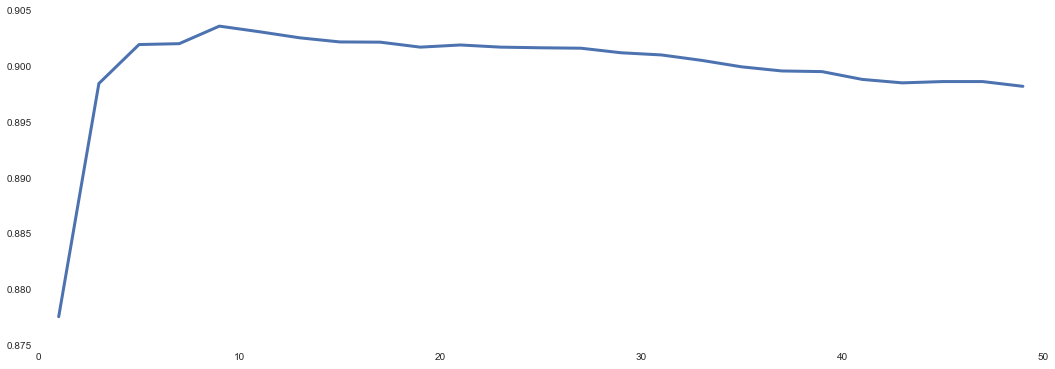

In [10]:
plt.figure(figsize=(18,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

In [11]:
from sklearn.cross_validation import cross_val_score
clf = neighbors.KNeighborsClassifier(9, weights='uniform')
scores = cross_val_score(clf, df_clean[cols].values, df['Subscriber Type'], cv=5)
print scores

[ 0.90590529  0.90564335  0.89906281  0.89722918  0.90264276]


In [12]:
np.mean(scores)

0.90209667880174571

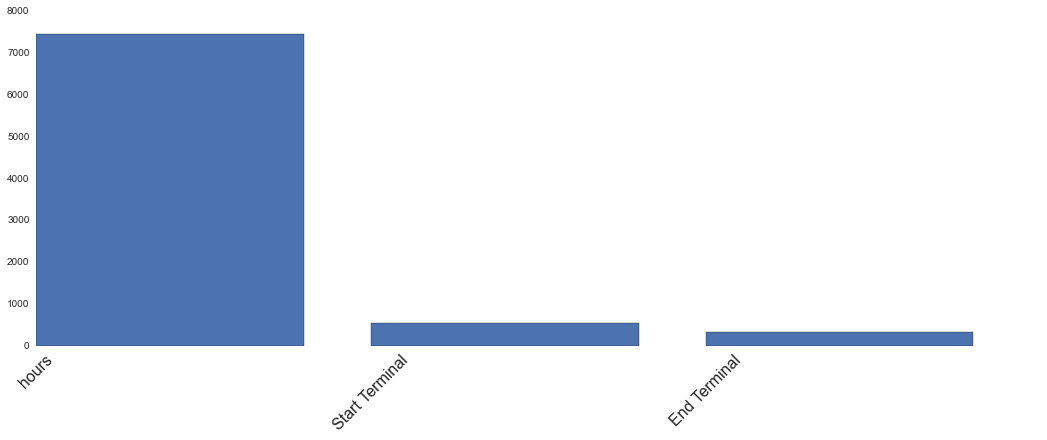

In [13]:
cols = ['hours', 'Start Terminal', 'End Terminal']

# Below returns highest signifiance for features 2 and 3
# (remember, Python uses index 0). 
n = np.arange(len(df_clean[cols].columns))

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

df_clean['target'] = df_clean['Subscriber Type'].map(lambda val: 0 if val == 'Customer' else 1)

ax.bar(n, feature_selection.f_classif(df_clean[cols], df_clean['target'].values)[0])

xtickNames = ax.set_xticklabels(df_clean[cols].columns)
ax.set_xticks(n)
_ = plt.setp(xtickNames, rotation=45, fontsize=16)

In [14]:
## classification
print cols
post_cols = ['hours', 'Start Terminal']

clf = neighbors.KNeighborsClassifier(10, weights='uniform')
clf.fit(df_clean[post_cols].values, df_clean['target'].values)

h = .1  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, y_min = df_clean[post_cols].min()
x_max, y_max = df_clean[post_cols].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


['hours', 'Start Terminal', 'End Terminal']


In [ ]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

In [ ]:
plt.figure(figsize=(18,6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

In [ ]:
# timeseries